In [3]:
# The script gets the timestamp for interesting events from the root files in
# sporzio@ubdaq-prod-ws01.fnal.gov:/home/gahs/torscopemon.
import ROOT
import array
import math
import os
from IPython.display import Image as Plot
ROOT.gROOT.SetBatch(1)

def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

# Good fit
g_xres = 950
g_yres = 425

#Good res
#g_xres = 1024
#g_yres = 768

# Path to input and output and variables
rootDir = "/home/sdporzio/HighVoltageTask/TorScopeMon/GAHS/RootFiles/"
miny1 = array.array("f",[])
miny2 = array.array("f",[])
miny3 = array.array("f",[])
miny4 = array.array("f",[])


# Loop through each file in rootDir
for filename in os.listdir(rootDir):
    # Open TTree
    fRoot = ROOT.TFile(rootDir+filename,"READ")
    tree = fRoot.torscope_tree

    # Loop
    for eventNumber in range(tree.GetEntries()):
        tree.GetEntry(eventNumber)
        miny1.append(tree.miny[0])
        miny2.append(tree.miny[1])
        miny3.append(tree.miny[2])
        miny4.append(tree.miny[3])

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvas1
TFile::Append:0: RuntimeWarning: Replacing existing TH1: histo1 (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: histo2 (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: histo3 (Potential memory leak).
TFile::Append:0: RuntimeWarning: Replacing existing TH1: histo4 (Potential memory leak).


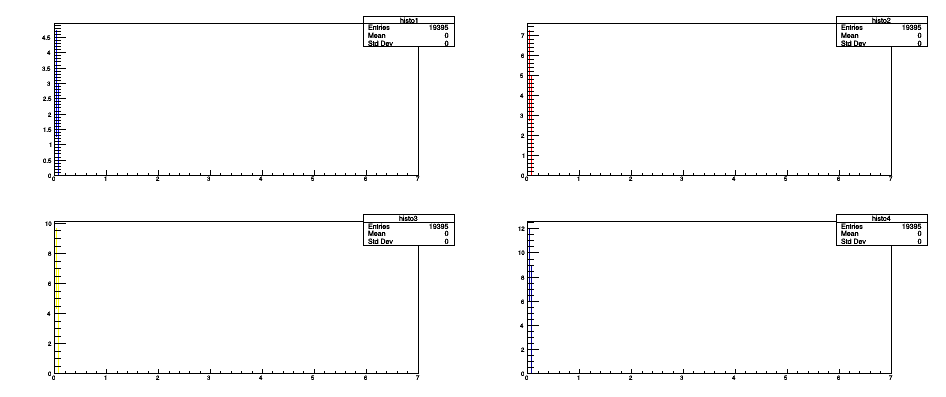

In [5]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("histo1","",100,0,0)
h2 = ROOT.TH1D("histo2","",100,0,0)
h3 = ROOT.TH1D("histo3","",100,0,0)
h4 = ROOT.TH1D("histo4","",100,0,0)
h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h3.SetLineColor(ROOT.kYellow)

for i in range(len(miny4)-1):
    h1.Fill(miny1[i])
    h2.Fill(miny2[i])
    h3.Fill(miny3[i])
    h4.Fill(miny4[i])

c1.Divide(2,2)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")
c1.cd(3)
h3.Draw("EH")
c1.cd(4)
h4.Draw("EH")

c1.SaveAs("OutVariables/histo1.png")
destruct(c1)
destruct(h1)
destruct(h2)
destruct(h3)
destruct(h4)
Plot("OutVariables/histo1.png")